# Examen 1 de matemática aplicada

## Ejercicio 1

### (a) Plantee una ecuación matemática que relacione el determinante de A con el factor de volumen dado.

###  $$\text{Dado que } \quad |\det(A)| = 15\text{ (fact de vol dado) }, \quad \det(A) > 0 \implies \det(A) = 15 $$



### (b) Resuelva dicha ecuación (puede hacerlo a mano o usando la herramienta de cálculo simbólicode su lenguaje de programación) para encontrar el(los) valor(es) posible(s) de α

$$\text{Dada la matriz A: }\begin{bmatrix}1 & 2 & 1 \\
                                          α & 4 & 1 \\
                                          2 & 1 & 3
                           \end{bmatrix}\text{ = 15}:$$


$$ \det(\mathbf{A}) = 1 \cdot \begin{vmatrix} 4 & 1 \\ 1 & 3 \end{vmatrix} - (2) \cdot \begin{vmatrix} α & 1 \\ 2 & 3 \end{vmatrix} + 1 \cdot \begin{vmatrix} α & 4 \\ 2 & 1 \end{vmatrix} \text{ = 15}  $$

Usando el método de expansión por cofactores

$$ 1(12 - 1) - 2(3α - 2) + 1(α - 8) = 15  $$

$$11 - 6α + 4 + α - 8 =15 $$
$$7 - 5α = 15       $$
$$-5α = 15 - 7  $$
$$α = -\frac{8}{5}  $$





### (c) Justifique: ¿Por qué es necesario que el determinante sea diferente de cero para que esta misión de recuperación tenga éxito? ¿Qué pasaría geométricamente con el mensaje si det(A) = 0

Respuesta:
Es necesario que el determinande de la matriz A sea diferente de cero para que dicha matriz pueda ser invertible. 
$$ \mathbf{A}^{-1} \text{ existe} \iff \det(\mathbf{A}) \neq 0 $$
Para solucionar nuestro desafío y recuperar el mensaje original (x), necesitamos aplicar la transformación inversa a nuestra matriz A

$$ x=\mathbf{A}^{-1}y$$

Si el det(A) es 0, geometricamente ocurriría un "colpso" espacial que haría imposible la recuperación del mensaje original. Esto ocurre porque el determinante representa el factor de escala de volumen que la matriz transforma. Si det(A) = 0 el volumen se reducea cero. Esto significa que todo el espacio (tridimensional en este caso) se "aplasta" y se convierte en un plano, una lénea o un solo punto.





### implementación computacional

(a) Defina la matriz A usando el valor de α encontrado en la Fase 1

Matriz (A): con parámetro α: <br>$$ A =\begin{bmatrix}
1 & 2 & 1 \\
-\frac{8}{5} & 4 & 1 \\
2 & 1 & 3
\end{bmatrix}$$



(b) Calcule el determinante de dicha matriz usando el computador para verificar que coincide con
la pista de los metadatos.

In [6]:
# importación de las librerías necesarias
import numpy as np
import math

# valor de alpha encontrado
alpha = -8/5

# pista de los metadatos (“factor de escala delvolumen”) dado en el enunciado del problema
detA = 15

# Se construye la matriz A con el valor de alpha enocontrado
A = np.array([
             [1,2,1],
             [alpha,4,1],
             [2,1,3]
             ])

# Verificamos el determinante
# Pista: Los metadatos decían que era 15
det_A = np.linalg.det(A)
print(f"Determinante calculado por NumPy: {det_A:.2f}")
if(det_A==detA):
    print("*****coincide con pista de metadatos*****")
else:
    print("xxxxxx No coincide con pista de metadatos xxxxxxx")

Determinante calculado por NumPy: 15.00
*****coincide con pista de metadatos*****


(c) Calcule la matriz inversa $$\mathbf{A}^{-1}$$

In [8]:
# Calculamos la matriz inversa de la matriz A

A_inversa = np.linalg.inv(A)
print("\n--- Matriz Inversa (A^-1) ---")
print(A_inversa)


--- Matriz Inversa (A^-1) ---
[[ 0.73333333 -0.33333333 -0.13333333]
 [ 0.45333333  0.06666667 -0.17333333]
 [-0.64        0.2         0.48      ]]


(d) Realice la operación de descifrado x = A−1y para cada uno de los 6 vectores interceptados.

In [32]:
# estos son los 6 vectores cifrados recibidos (correspondientes a un mensaje de 18 caracteres)
y1 = np.array([[56, 67, 103]]).T
y2 = np.array([[54, 11, 117]]).T
y3 = np.array([[77, 55, 136]]).T
y4 = np.array([[70, 95, 110]]).T
y5 = np.array([[87, 77, 136]]).T
y6 = np.array([[96, 111, 138]]).T

lista_x = []

#listamos los valores interceptados y
vectores_y = [y1, y2, y3, y4, y5, y6]

for i, y in enumerate(vectores_y, start=1):
    # multiplicación de la inversa con los elementos y. El operador '@' en Python se usa para multiplicación de matrices/vectores
    x = A_inversa @ y
    #redondeo el valor al entero más cercano para evitar confusiones con los decimales
    x = np.round(x).astype(int)
    print(f"\n--- Vector Decodificado (x{i}) ---Guardado en lista x") 
    lista_x.append(x)  
    #print(f"Resultado bruto: {x}")
    #print(f"Resultado redondeado (para traducción): {np.round(x).astype(int)}")


--- Vector Decodificado (x1) ---Guardado en lista x

--- Vector Decodificado (x2) ---Guardado en lista x

--- Vector Decodificado (x3) ---Guardado en lista x

--- Vector Decodificado (x4) ---Guardado en lista x

--- Vector Decodificado (x5) ---Guardado en lista x

--- Vector Decodificado (x6) ---Guardado en lista x


(e) Muestre los vectores resultantes (x) y realice la conversión numérica a texto usando la tabla
suministrada para revelar el mensaje oculto.

In [45]:
print("lista de vectores x:")
for i, x_vec in enumerate(lista_x, start=1):
    # .flatten() convierte el vector columna [[n1], [n2], [n3]] en [n1, n2, n3]
    # para que la impresión sea más legible.
    valores = x_vec.flatten()
    print(f"x{i}: {valores}")
    

lista de vectores x:
x1: [ 5 12 27]
x2: [20  5 24]
x3: [20 15 27]
x4: [ 5 19 27]
x5: [20 21 25]
x6: [15 27 27]


In [49]:
#Proceso de Descifrado

# Creamos un diccionario llamado alfabeto, donde la llave es el número y el valor es la letra
alfabeto = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O', 16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y', 26: 'Z', 27: ' '
}

#Varible para almacenar el mensaje final descifrado
mensaje_final = ""

print(f"{'Vector Y':<20} | {'Vector X (Números)':<20} | {'Letras'}")
print("-" * 60)

for y_num in vectores_y:
    y_vec = y_num
    
    # Operación matemática central: x = A^-1 * y
    x_vec = A_inversa @ y_vec
    
    # Usamos .flatten() para pasar de [[1], [2], [3]] a [1, 2, 3]
    x_enteros = np.round(x_vec).astype(int).flatten() 
    
    # Ahora 'num' será un entero puro y funcionará con el diccionario
    letras = "".join([alfabeto.get(num, '?') for num in x_enteros])
    mensaje_final += letras
    
    # Usamos tolist() en el print para que se vea más limpio
    print(f"{str(y_num.flatten().tolist()):<20} | {str(x_enteros.tolist()):<20} | {letras}")

print("-" * 60)
print(f"MENSAJE OCULTO: {mensaje_final}")

Vector Y             | Vector X (Números)   | Letras
------------------------------------------------------------
[56, 67, 103]        | [5, 12, 27]          | EL 
[54, 11, 117]        | [20, 5, 24]          | TEX
[77, 55, 136]        | [20, 15, 27]         | TO 
[70, 95, 110]        | [5, 19, 27]          | ES 
[87, 77, 136]        | [20, 21, 25]         | TUY
[96, 111, 138]       | [15, 27, 27]         | O  
------------------------------------------------------------
MENSAJE OCULTO: EL TEXTO ES TUYO  


MENSAJE OCULTO: EL TEXTO ES TUYO 

# Ejercicio 2

El ejercicio en una cadena de Markov, porque describe una secuencia de eventos _(estados)_ donde la probabilidad del futuro depende exclusivamente del estado actual.

La cadena de Markov puede ser visto como un grafo dirigido y ponderado:
**Nodos:** Estados del 1 al 7
**Aristas:** Transiciones posibles entre los estados (anterior-mismo-siguiente)
**Ponderación:** Probabilidades ($0 \le P_{ij} \le 1$)

La matriz de transición (P) es una matriz estocástica:

| Estado Actual | Estado Anterior | Mismo Estado | Estado Siguiente |
| :---: | :---: | :---: | :---: |
| 1 | 0 | 0.95 | 0.05 |
| 2 | 0.40 | 0.30 | 0.30 |
| 3 | 0.45 | 0.10 | 0.45 |
| 4 | 0.40 | 0.20 | 0.40 |
| 5 | 0.45 | 0.10 | 0.45 |
| 6 | 0.30 | 0.30 | 0.40 |
| 7 | 0.05 | 0.95 | 0 |


In [1]:
#Librerías necesarias:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

np.random.seed(20)  # Para que la aleatoriedad sea reproducible, y los resultados no cambien para los análisis posteriores.

In [2]:
#Matriz de transición

P = np.array([
    # E1    E2    E3    E4    E5    E6    E7   ← Estado destino
    [0.95, 0.05, 0.00, 0.00, 0.00, 0.00, 0.00],  # Desde Estado 1
    [0.40, 0.30, 0.30, 0.00, 0.00, 0.00, 0.00],  # Desde Estado 2
    [0.00, 0.45, 0.10, 0.45, 0.00, 0.00, 0.00],  # Desde Estado 3
    [0.00, 0.00, 0.40, 0.20, 0.40, 0.00, 0.00],  # Desde Estado 4 (Estado inicial)
    [0.00, 0.00, 0.00, 0.45, 0.10, 0.45, 0.00],  # Desde Estado 5
    [0.00, 0.00, 0.00, 0.00, 0.30, 0.30, 0.40],  # Desde Estado 6
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.05, 0.95],  # Desde Estado 7
])

#Como es Markov cada fila debe sumar 1, lo verificamos:
print("PASO 1: VERIFICACIÓN DE LA MATRIZ DE TRANSICIÓN P")
print("\nSuma de cada fila (todas deben ser exactamente 1.0):")
for i, suma in enumerate(P.sum(axis=1)):
    print(f"  Fila del Estado {i+1}: {suma:.2f} ✓")

PASO 1: VERIFICACIÓN DE LA MATRIZ DE TRANSICIÓN P

Suma de cada fila (todas deben ser exactamente 1.0):
  Fila del Estado 1: 1.00 ✓
  Fila del Estado 2: 1.00 ✓
  Fila del Estado 3: 1.00 ✓
  Fila del Estado 4: 1.00 ✓
  Fila del Estado 5: 1.00 ✓
  Fila del Estado 6: 1.00 ✓
  Fila del Estado 7: 1.00 ✓


In [3]:
# Nombres de los estados (para etiquetas en gráficos)
nombres_estados = [
    "1: Muy\nInsatisfecho",
    "2: Insatisfecho",
    "3: Lig.\nInsatisfecho",
    "4: Neutral",
    "5: Lig.\nSatisfecho",
    "6: Satisfecho",
    "7: Muy\nSatisfecho"
]


## 2.1. Simulación de caminata aleatoria

Para la simulación se hace uso de una función para ejecutar la simulación, y la simulación la repetimos 10 veces haciendo uso del método Monte Carlo para luego observar tendencias estadísticas.

In [4]:
#Función de simulación de la cadena de Markov (camianta aleatoria)
def simular_caminata(estado_inicial, num_pasos, matriz_P): #(int (1-7), int, np.array)
   
    # Convertimos a índice Python (0-6)
    estado_actual = estado_inicial - 1

    # Guardamos el recorrido completo
    recorrido = [estado_actual + 1]  # el +1 devuelve a escala 1-7

    for _ in range(num_pasos):
        # Tomamos las probabilidades de transición desde el estado actual
        # Matemáticamente: esta es la fila P[estado_actual, :]
        probabilidades = matriz_P[estado_actual, :]

        # Elegimos el siguiente estado según esas probabilidades
        # np.random.choice(7) elige un número entre 0 y 6,
        # con las probabilidades dadas
        estado_actual = np.random.choice(7, p=probabilidades)

        # Guardamos en escala 1-7
        recorrido.append(estado_actual + 1)

    return recorrido

In [5]:
#Simulación de la caminata usando la función
estado_inicial = 4    # Neutral
num_pasos      = 100  # Pasos por simulación
num_simulaciones      = 10   # Número de repeticiones


print("TAREA 1: SIMULACIÓN DE 10 CAMINATAS (100 pasos c/u)")
print(f"Estado inicial: {estado_inicial} (Neutral)")

simulaciones   = []
estados_finales = []

for i in range(num_simulaciones):
    recorrido = simular_caminata(estado_inicial, num_pasos, P)
    simulaciones.append(recorrido)
    estados_finales.append(recorrido[-1])
    print(f"  Simulación {i+1:2d}: estado final = {recorrido[-1]}")

print(f"\nResumen de estados finales: {estados_finales}")
print(f"Promedio del estado final:  {np.mean(estados_finales):.2f}")
print(f"Estado final más frecuente: {max(set(estados_finales), key=estados_finales.count)}")

TAREA 1: SIMULACIÓN DE 10 CAMINATAS (100 pasos c/u)
Estado inicial: 4 (Neutral)
  Simulación  1: estado final = 7
  Simulación  2: estado final = 7
  Simulación  3: estado final = 4
  Simulación  4: estado final = 4
  Simulación  5: estado final = 2
  Simulación  6: estado final = 5
  Simulación  7: estado final = 1
  Simulación  8: estado final = 1
  Simulación  9: estado final = 1
  Simulación 10: estado final = 2

Resumen de estados finales: [7, 7, 4, 4, 2, 5, 1, 1, 1, 2]
Promedio del estado final:  3.40
Estado final más frecuente: 1


## 2.2. Tendencia del cliente

El objetivo es responde  ¿A donde tiende a terminar el cliente con un nivel de satisfacción neutral después de un tiempo?

Para tener una mejor estimación estadística se aumenta el número de simulaciones, usando la Ley de los Grandes Números, que dice que, entre más repitas un experimento aleatorio, más cerca están los resultados del valor esperado.

In [6]:
num_simulaciones_grande = 500

print("TAREA 2: TENDENCIA DE CAMBIO DE LOS ESTADOS (500 simulaciones)")
print("=" * 60)

estados_finales_grande = []

for _ in range(num_simulaciones_grande):
    recorrido = simular_caminata(estado_inicial, num_pasos, P)
    estados_finales_grande.append(recorrido[-1])

# Contamos cuántas veces terminó en cada estado (frecuencuia de cada estado)
conteos = np.bincount(estados_finales_grande, minlength=8)[1:]  # índice 1-7
frecuencias = conteos / num_simulaciones_grande * 100  # convertir a porcentaje

print("\nDistribución de estados finales tras 100 pasos:")
print(f"{'Estado':<10} {'Veces':<10} {'Frecuencia %':<15}")
print("-" * 35)
for i, (c, f) in enumerate(zip(conteos, frecuencias)):
    barra = "█" * int(f / 2)
    print(f"  {i+1:<7} {c:<10} {f:5.1f}%  {barra}")


TAREA 2: TENDENCIA DE CAMBIO DE LOS ESTADOS (500 simulaciones)

Distribución de estados finales tras 100 pasos:
Estado     Veces      Frecuencia %   
-----------------------------------
  1       199         39.8%  ███████████████████
  2       19           3.8%  █
  3       15           3.0%  █
  4       23           4.6%  ██
  5       17           3.4%  █
  6       24           4.8%  ██
  7       203         40.6%  ████████████████████


Después de 100 iteraciones, un cliente que empieza en estado 4 (neutral) tiende a terminar en:

* Estado 1(Muy insatisfecho): 39.8%
* Estado 7 (Muy satisfecho): 40.6%

El cliente tiene a polarizarse.

## 2.3. Visualización del recorrido

Visualización del recorrido de como cambia el novel de satisfacción, que ilustre como cambia el nivel de satisfacción en cada paso.

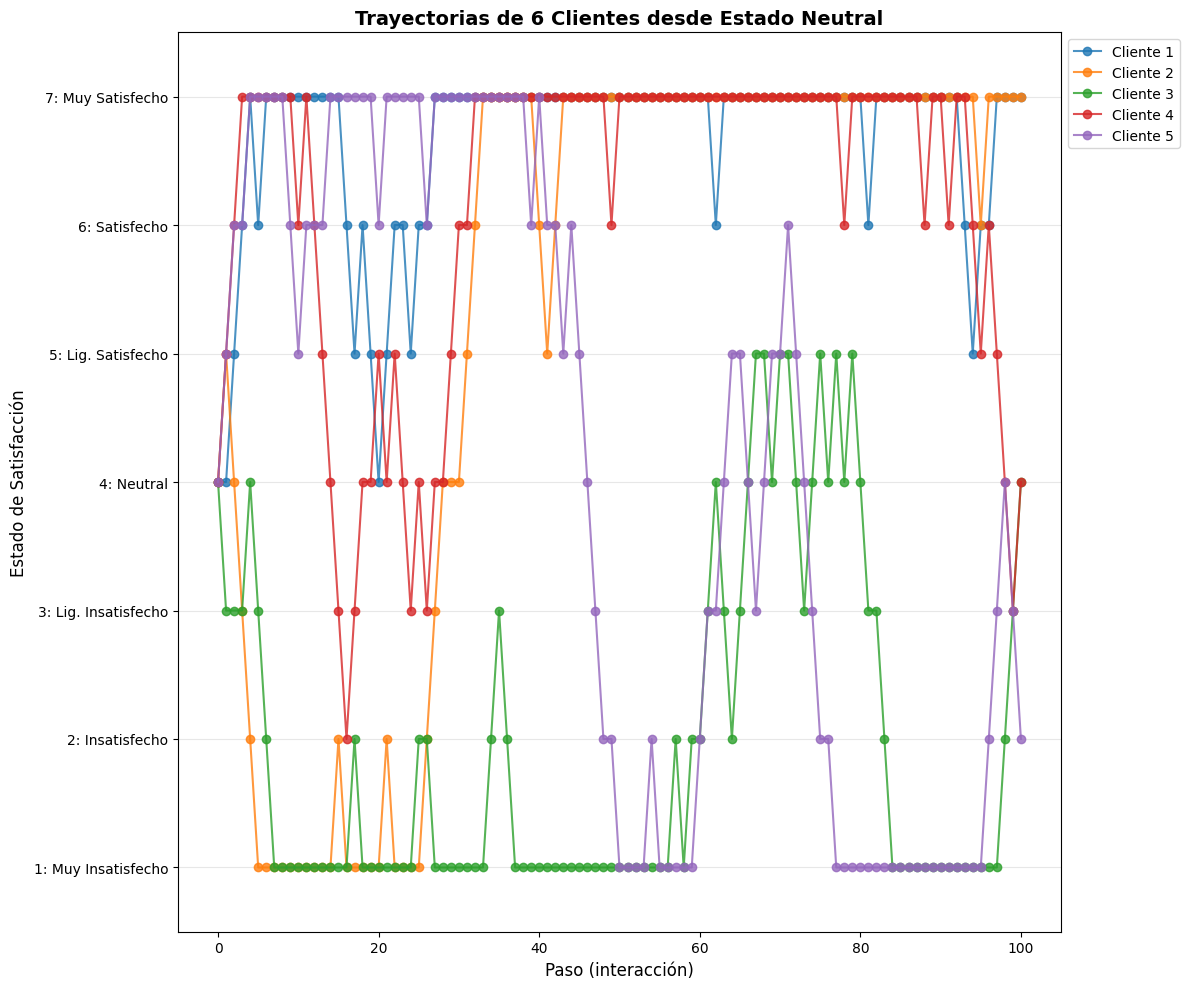

In [20]:
plt.figure(figsize=(12, 10)) # Un tamaño cómodo para ver las 6 líneas

for i, recorrido in enumerate(simulaciones[:5], start=1): #Mostrando las primers 5 simulaciones apra que no se vea sobre cargado el gráfico
    
    plt.plot(recorrido, marker='o', linestyle='-', alpha=0.8, label=f'Cliente {i}')

# Configuración de ejes y título
plt.xlabel('Paso (interacción)', fontsize=12)
plt.ylabel('Estado de Satisfacción', fontsize=12)
plt.title('Trayectorias de 6 Clientes desde Estado Neutral', 
          fontsize=14, fontweight='bold')

# Etiquetas del eje Y
plt.yticks(range(1, 8), [
    '1: Muy Insatisfecho',
    '2: Insatisfecho',
    '3: Lig. Insatisfecho',
    '4: Neutral',
    '5: Lig. Satisfecho',
    '6: Satisfecho',
    '7: Muy Satisfecho'
])

plt.ylim(0.5, 7.5)
plt.grid(True, axis='y', alpha=0.3) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.tight_layout()
plt.show()

Del gráfico observamos que el estado del que es más díficil salir partiendo de un estado 4 (neutral) es el estado 7 (muy satisfecho)

## 2.4. Explicación esquemática dinámica del proceso

Esta explicación usa conceptos de algebra lineal para la explicación del proceso que se llevo a cabo para la creación del código de los anteriores numerales.
<div align="center">
  <img src="939accf6-7efa-4aa3-a590-5ee1757dfb73.jpg" width="500">
</div>

Como se mencionó inicialmente, una cadena de Márkov puede visualizarse como un grafo dirigido y ponderado. Sin embargo, posee reglas específicas: es una matriz estocástica donde todas sus filas deben sumar 1 y se cumple la propiedad de Márkov (el estado siguiente solo depende del estado actual).


Conceptos básicos de algebra lineal aplicados:

1. **Vector de Estado:** para representar donde estamos. En este caso sería estado 4.
$$v_0 = [0, 0, 0, 1, 0, 0, 0]$$

2. **Matriz de transiciones  ($P$):** donde cada **fila** representa el estado actual, cada **columna** representa el estado al que pasaría y cada **celda** $a_{ij}$ es la probabilidad de pasar de $i$ a $j$.

$$
\begin{bmatrix}
0.95 & 0.05 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
0.40 & 0.30 & 0.30 & 0.00 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.45 & 0.10 & 0.45 & 0.00 & 0.00 & 0.00 \\
0.00 & 0.00 & 0.40 & 0.20 & 0.40 & 0.00 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.45 & 0.10 & 0.45 & 0.00 \\
0.00 & 0.00 & 0.00 & 0.00 & 0.30 & 0.30 & 0.40 \\
0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.05 & 0.95 \\
\end{bmatrix}
$$

3. **Multiplicación de matrices:** para saber el estado del cliente en el futuro.

$$v_{próximo} = v_{actual} \cdot P$$

Si se quiere ver más d eun paso adelante, se multiplina _P_ otra vez
$$v_{próximo2} = v_{actual} \cdot P^2$$

que tambien puede representarse 

$$v_n = v_0 \cdot P^n$$

Siendo _n_ el número de pasos
